### 作业回顾
1. 11.23_王伯韬.ipynb 梯度下降法，实际用的是牛顿法，而且还写成了(x * x + 2) / (2 * x)
2. 11.23_王文义.ipynb 最小二乘法写错了
3. 11.23_谢尚强.ipynb 的意见，并且最小二乘法也理解错了。没有转置
4. 11.23_黄殿元.ipynb 提到最小二乘法避免不可求逆的问题，非常不错

#### 梯度下降
1. 方向   ->    导数，是函数上升最快的方向，导数的值没有关系
2. 步长   ->    学习率

In [67]:
import math

### 梯度下降法求解sqrt(v) $$ loss = (x ^ 2 - v) ^ 2 $$

In [99]:
v = 2
x = v / 2   # 定义初始值，问题
lr = 0.01   # 定义步长
precision = 1    # 定义loss值
niter = 0
while precision > 1e-8:
    niter += 1
    fx = x ** 2 - v     #  f(x) = x ^ 2 - v
    loss = fx ** 2      #  loss = (x ^ 2 - v) ^ 2
    precision = abs(fx)
    da = 2 * fx
    dx = 2 * x
    ldx = da * dx
    x = x - lr * ldx

x, math.sqrt(v), f"迭代{niter}次"

(1.4142135597978454, 1.4142135623730951, '迭代112次')

### 牛顿法求解sqrt(v)
### $$ x^{+} = x - f(x) / f^{'}(x) $$
### $$ f(x) = x ^ 2 - v $$

In [100]:
v = 2
x = v
niter = 0
fx = x ** 2 - v
while fx > 1e-8:
    niter += 1
    dfx = 2 * x
    x = x - fx / dfx
    fx = x ** 2 - v

x, math.sqrt(v), f"迭代{niter}次"

(1.4142135623746899, 1.4142135623730951, '迭代4次')

### 二分法求解sqrt(v)
### $$ c = (a + b) / 2 $$

In [101]:
v = 2
a = 0
b = v
niter = 0
while True:
    niter += 1
    x = (a + b) / 2
    diff = x ** 2 - v
    
    if abs(diff) < 1e-8:
        break
    elif diff > 0:
        b = x
    else:
        a = x

x, math.sqrt(v), f"迭代{niter}次"

(1.4142135605216026, 1.4142135623730951, '迭代28次')

### 求解仿射变换矩阵M

$$
 a^{'}_{x} = a_{x}m_{00}+a_{y}m_{01}+m_{02}
$$
$$
 a^{'}_{y} = a_{x}m_{10}+a_{y}m_{11}+m_{12}
$$
   
$$
 b^{'}_{x} = b_{x}m_{00}+b_{y}m_{01}+m_{02}
$$
$$
 b^{'}_{y} = b_{x}m_{10}+b_{y}m_{11}+m_{12}
$$
   
$$
 c^{'}_{x} = c_{x}m_{00}+c_{y}m_{01}+m_{02}
$$
$$
 c^{'}_{y} = c_{x}m_{10}+c_{y}m_{11}+m_{12}
$$

* 问题转换为矩阵乘法，提取出其中的系数部分

$$
\begin{gathered}
\begin{bmatrix} 
a_x & a_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\ 
0   & 0   & 0 & c_x & c_y & 1 \\
\end{bmatrix}
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
=
\begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}
\end{gathered}
$$

* 其中
$$A = \begin{bmatrix}
a_x & a_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & a_x & a_y & 1 \\
b_x & b_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & b_x & b_y & 1 \\
c_x & c_y & 1 & 0   & 0   & 0 \\
0   & 0   & 0 & c_x & c_y & 1 
\end{bmatrix}
\quad
M = 
\begin{bmatrix} 
m_{00} \\
m_{01} \\
m_{02} \\
m_{10} \\
m_{11} \\
m_{12} \\
\end{bmatrix}
\quad
B = \begin{bmatrix} 
a'_x \\
a'_y \\
b'_x \\
b'_y \\
c'_x \\
c'_y \\
\end{bmatrix}$$

* 定义最小二乘法
$$ argmin||AM - B||_{2}^2 $$
$$ M = (A^T A) ^{-1}A^TB $$

In [71]:
import numpy as np

A = [
    [0, 0],
    [50, 0],
    [50, 50]
]

B = [
    [30, 30],
    [130, 30],
    [130, 130]
]

(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]

A = np.array([
    [ax, ay, 1, 0, 0, 0],
    [0, 0,   0, ax, ay, 1],
    [bx, by, 1, 0, 0, 0],
    [0, 0,   0, bx, by, 1],
    [cx, cy, 1, 0, 0, 0],
    [0, 0,   0, cx, cy, 1]
])

B = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

M = np.linalg.inv(A.T @ A) @ A.T @ B
M.reshape(2, 3)

array([[ 2.,  0., 30.],
       [ 0.,  2., 30.]])

### 使用梯度下降法求解矩阵M

In [103]:
A = [
    [0, 0],
    [50, 0],
    [50, 50]
]

B = [
    [30, 30],
    [130, 30],
    [130, 130]
]

(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]

X = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

Y = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

theta = np.random.normal(size=(6, 1))  # 初始化
lr = 3e-4

# 学习率策略
schedule = {
    20000: 1e-5,
    28000: 1e-6
}

for i in range(30000):
    
    if i in schedule:
        lr = schedule[i]
        print(f"set lr = {lr}")
    
    predict = X @ theta
    loss = 0.5 * np.sum(Y - predict) ** 2
    if i % 3000 == 0:
        print(f"iter {i} loss = {loss:g}")
        
    # 矩阵求导, deltaB = A^T * G
    delta_t = X.T @ (predict - Y)
    theta = theta - lr * delta_t

np.round(theta.reshape(2, 3))

iter 0 loss = 69876.5
iter 3000 loss = 290.69
iter 6000 loss = 48.0723
iter 9000 loss = 7.94988
iter 12000 loss = 1.3147
iter 15000 loss = 0.217416
iter 18000 loss = 0.0359548
set lr = 1e-05
iter 21000 loss = 0.0106182
iter 24000 loss = 0.0100001
iter 27000 loss = 0.00941796
set lr = 1e-06


array([[ 2., -0., 30.],
       [ 0.,  2., 30.]])

#### 扩展阅读 仿射变换

* 下载图片数据

In [2]:
!wget "https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1606201196342&di=479db55a54540675d6cc8c943a0ba926&imgtype=0&src=http%3A%2F%2Fhbimg.b0.upaiyun.com%2F5dea8d6786aa54e71e1a62095bfa3453a3350fc51a27a-NULYO0_fw658" --output-document=kj.jpg
!wget "https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1606199451057&di=fda4b13d4e850023a6be29c283fe176e&imgtype=0&src=http%3A%2F%2Fimg14.360buyimg.com%2Fn1%2Fjfs%2Ft17179%2F96%2F2428526029%2F147715%2Fe5ad53a6%2F5af3dfbbNaf5aaf6d.jpg" --output-document=mask.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


* 查看图像大小

kj shape (627, 658, 3)


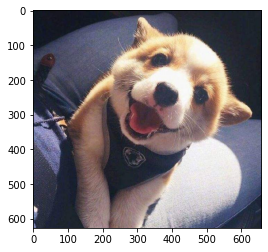

In [122]:
import matplotlib.pyplot as plt   # pip install matplotlib
import cv2  #  pip install opencv-python
image = cv2.imread("kj.jpg")   #  bgr
plt.imshow(image[..., ::-1])   #  627, 658, 3     image[:, :, ::-1]  #  bgr,   rgb
print("kj shape", image.shape)

mask shape (350, 350, 3)


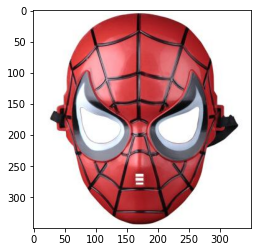

In [111]:
image = cv2.imread("mask.jpg")
plt.imshow(image[..., ::-1])
print("mask shape", image.shape)

In [112]:
# 定义坐标点
A = [
    [102, 187],    # mask的 左眼
    [234, 187],    # mask的 右眼
    [168, 297]     # mask的 嘴巴
]

B = [
    [361, 144],    # kj的左眼
    [482, 242],    # kj的右眼
    [321, 310]     # kj的嘴巴
]

(ax,   ay), (bx,   by), (cx,   cy) = A[0], A[1], A[2]
(dax, day), (dbx, dby), (dcx, dcy) = B[0], B[1], B[2]

A = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

B = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).reshape(6, 1)

M = np.linalg.inv(A.T @ A) @ A.T @ B
M = M.reshape(2, 3)
M

array([[   0.91666667,   -0.91363636,  438.35      ],
       [   0.74242424,    1.06363636, -130.62727273]])

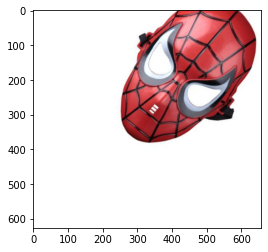

In [121]:
kj = cv2.imread("kj.jpg")
mask = cv2.imread("mask.jpg")

kj_height, kj_width = kj.shape[:2]
out_mask = cv2.warpAffine(mask, M, (kj_width, kj_height), borderValue=(255, 255, 255))
plt.imshow(out_mask[..., ::-1])

In [120]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# x, y, z
# x
# x, y
# x, y, z
# r, g, b
# r, g, b  [0, 255]
# r ->  255 - 0 + 1 = 256
# 256^3 = 贼大
# r g b ->  合成一个颜色值
# height, width,  (r, g, b)    ->  彩色图
# height, widht, 3   (r, g, b),  (b, g, r)
# bgrbgrbgr   bbbgggrrr

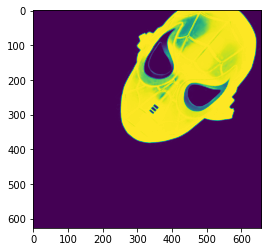

In [118]:
weight = np.abs(out_mask / 255 - 1)                                    # out_mask是0-255的值，归一化0-1以内后，1为白色。计算像素与白色的差异，正确来讲计算欧氏距离是对的
weight = np.fmax(weight[..., 0], weight[..., 1], weight[..., 2])       # 获取每个通道的最大值
weight = sigmoid((weight - 0.3) * 10)                                  # 对权重进行变换，使得它小于0.3的部分接近0，大于0.3部分增强权重
weight = weight.reshape(*weight.shape, 1)                              # 图像需要变为3个维度
plt.imshow(weight[..., 0])                                             # 显示图像

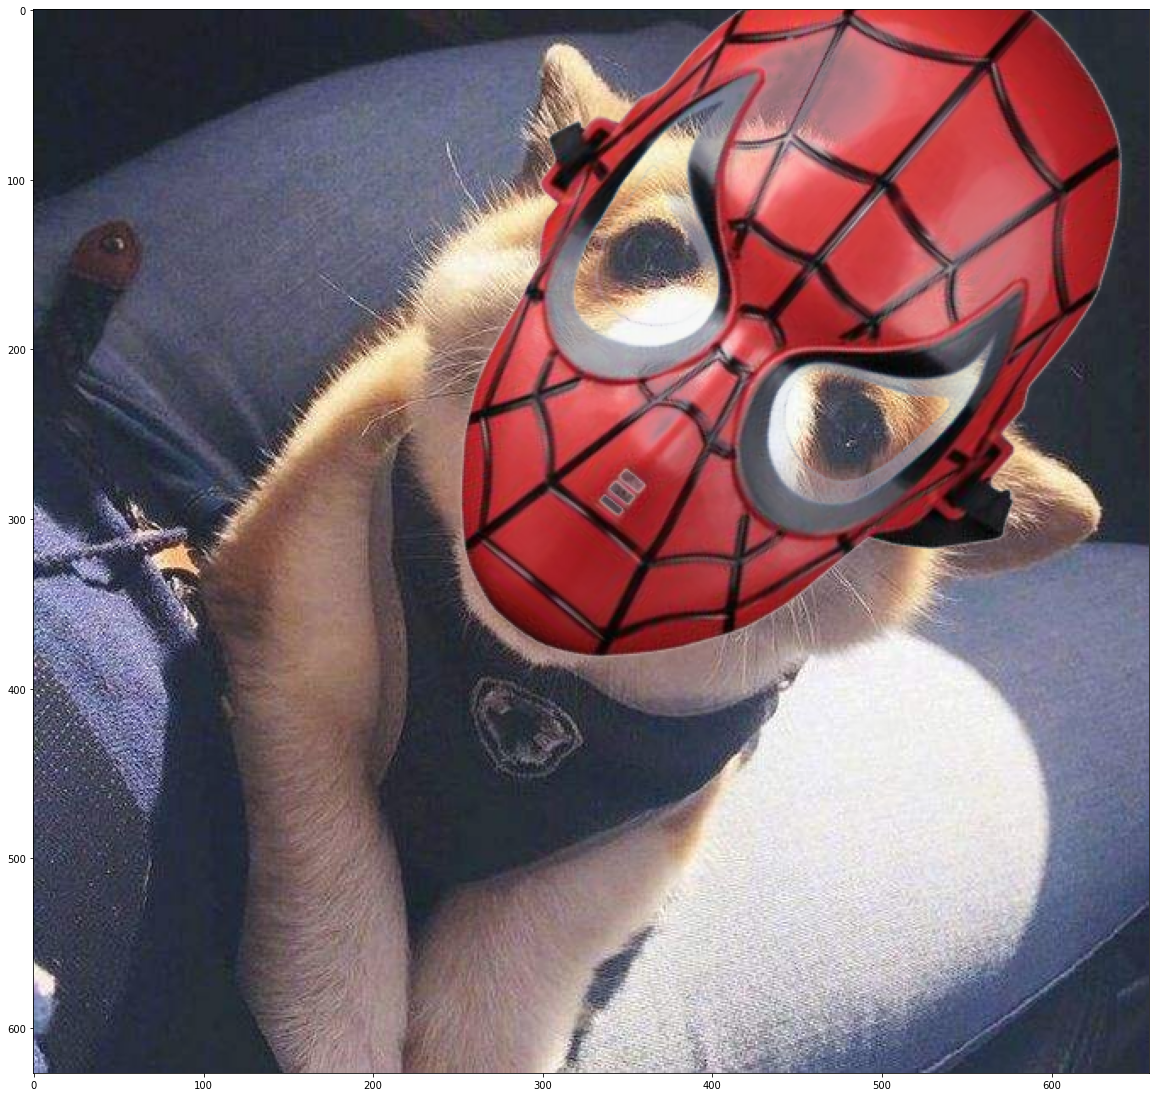

In [123]:
merge = (weight * out_mask + kj * (1 - weight)).astype(np.uint8)         # 合并mask和kj图像，weight是mask的权重
plt.figure(figsize=(20, 20))                                             # 画布显示弄大点
plt.imshow(merge[..., ::-1])                                             # 显示图像，因为通道问题，需要切片倒置通道维度

#### 矩阵求导
1. 考虑矩阵乘法 $$ A \cdot B = C $$
2. 考虑Loss函数 $$ L = \sum^m_{i}\sum^n_{j}{(C_{ij} - p)^2} $$
3. 考虑C的每一项导数 $$ \triangledown C_{ij} = \frac{\partial L}{\partial C_{ij}} $$
4. 考虑ABC都为2x2矩阵时，定义G为L对C的导数
$$A = \begin{bmatrix}
a & b\\
c & d
\end{bmatrix}
\quad
B = 
\begin{bmatrix} 
e & f \\
g & h
\end{bmatrix}
\quad
C = \begin{bmatrix} 
i & j \\
k & l 
\end{bmatrix}
\quad
G = \begin{bmatrix} 
\frac{\partial L}{\partial i} & \frac{\partial L}{\partial j} \\
\frac{\partial L}{\partial k} & \frac{\partial L}{\partial l} 
\end{bmatrix}
$$

$$
G = \begin{bmatrix} 
w & x \\
y & z 
\end{bmatrix}
$$

5. 展开左边 A x B
$$C = \begin{bmatrix}
i = ae + bg & j = af + bh\\
k = ce + dg & l = cf + dh
\end{bmatrix}
$$

6. L对于每一个A的导数$$ \triangledown A_{ij} = \frac{\partial L}{\partial A_{ij}} $$

$$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial i} * \frac{\partial i}{\partial a} + \frac{\partial L}{\partial j} * \frac{\partial j}{\partial a} $$

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial i} * \frac{\partial i}{\partial b} + \frac{\partial L}{\partial j} * \frac{\partial j}{\partial b} $$

$$ \frac{\partial L}{\partial c} = \frac{\partial L}{\partial k} * \frac{\partial k}{\partial c} + \frac{\partial L}{\partial l} * \frac{\partial l}{\partial c} $$

$$ \frac{\partial L}{\partial d} = \frac{\partial L}{\partial k} * \frac{\partial k}{\partial d} + \frac{\partial L}{\partial l} * \frac{\partial l}{\partial d} $$

$$ \frac{\partial L}{\partial a} = we + xf \\ $$
$$ \frac{\partial L}{\partial b} = wg + xh \\ $$
$$ \frac{\partial L}{\partial c} = ye + zf \\ $$
$$ \frac{\partial L}{\partial d} = yg + zh $$

7. 因此A的导数为$$ 
\triangledown A = \begin{bmatrix}
we + xf & wg + xh\\
ye + zf & yg + zh
\end{bmatrix}
\quad
\triangledown A = \begin{bmatrix}
w & x\\
y & z
\end{bmatrix}
\begin{bmatrix}
e & g\\
f & h
\end{bmatrix}
$$

$$
\triangledown A = G \cdot B^T
$$

8. 同理B的导数为:
$$ \frac{\partial L}{\partial e} = wa + yc \\ $$
$$ \frac{\partial L}{\partial f} = xa + zc \\ $$
$$ \frac{\partial L}{\partial g} = wb + yd \\ $$
$$ \frac{\partial L}{\partial h} = xb + zd $$

$$ 
\triangledown A = \begin{bmatrix}
wa + yc & xa + zc\\
wb + yd & xb + zd
\end{bmatrix}
\quad
\triangledown A = \begin{bmatrix}
a & c\\
b & d
\end{bmatrix}
\begin{bmatrix}
w & x\\
y & z
\end{bmatrix}
$$

$$
\triangledown B = A^T \cdot G
$$

* 在梯度下降法中使用它吧

#### 今日总结
1. 预习BP的内容
2. 了解mnist任务
3. labelsmoothing
4. softmax的原理和导数推导，labelsmoothing后的softmax推导
5. SGD、SGD Momentum、Adam
6. weight deacy
7. numpy的使用、matplotlib的使用、pandas的使用、cv2的使用

#### 作业：
1. 实现逻辑回归
2. sigmoid和交叉熵一起的求导推导

54.09609133690326
0.22752126545756696
0.1266965365413154
0.08924396214001526
0.06937332291627497
0.05696244126282105
0.04843680179994754
0.042201089811940734
0.037432461712568074
0.03366216955961143
Predict is Positive


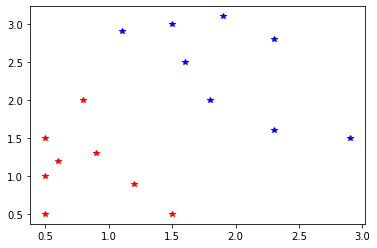

In [174]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], np.float32).reshape(16, 1)
data = np.array(
    [(0.5, 0.5), (0.5, 1.0), (0.5, 1.5), (0.8, 2.0), (0.6, 1.2), (0.9, 1.3), (1.2, 0.9), (1.5, 0.5) , 
     (1.1, 2.9), (1.5, 3.0), (1.6, 2.5), (1.8, 2.0), (1.9, 3.1), (2.3, 2.8), (2.3, 1.6), (2.9, 1.5)], 
np.float32)

num_data, data_dims = data.shape
new_data = np.ones((num_data, data_dims + 1))
new_data[:, :2] = data

theta = np.random.normal(size=(3, 1))
lr = 1e-1

for i in range(10000):
    predict = new_data @ theta
    predict = sigmoid(predict)
    loss = -np.sum(label * np.log(predict) + (1 - label) * np.log(1 - predict))

    d_theta = new_data.T @ (predict - label)
    theta = theta - lr * d_theta
    
    if i % 1000 == 0:
        print(loss)
        
plt.plot(new_data[:8, 0], new_data[:8, 1], "r*")
plt.plot(new_data[8:, 0], new_data[8:, 1], "b*")

point = np.array([2.5, 1.5, 1], dtype=np.float32)
predict = sigmoid(point @ theta)
#"Positive" if predict > 0.5 else "Negative"
#x = np.arange(0, 5.0, 0.1)
#y = (-theta[0] - theta[1] * x) / theta[2]
#plt.plot(x, y, "b-")
print("Predict is %s" % ("Positive" if predict > 0.5 else "Negative"))

In [ ]:
#i
loss = (i - p)^2
i = ae + bg

loss > a
loss > i  *  i > a
w  *  e
ew  we

loss2 = (j - p)^2
j = af + bh

loss2 -> a
loss2 -> j  *  j > a
x *  f
